In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
df=pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

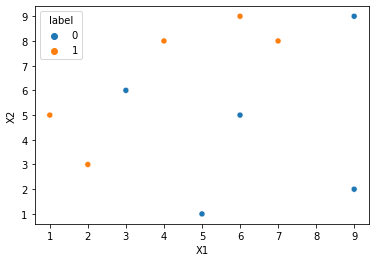

In [3]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue= df['label'])

In [4]:
x= df.iloc[:,:2].values
y  = df.iloc[:,-1].values

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(x,y)

DecisionTreeClassifier(max_depth=1)

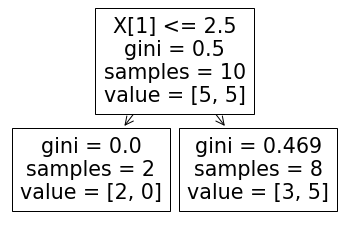

In [5]:
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()


<AxesSubplot:>

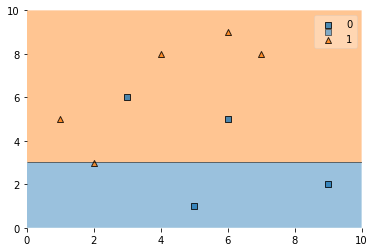

In [6]:
plot_decision_regions(x,y,clf =dt,legend=True)


In [7]:
df['ypred'] = dt.predict(x)
df


,X1,X2,label,ypred
0,1,5,1,1
1,2,3,1,1
2,3,6,0,1
3,4,8,1,1
4,5,1,0,0
5,6,9,1,1
6,6,5,0,1
7,7,8,1,1
8,9,9,0,1
9,9,2,0,0


In [8]:
df.shape[0]


10

In [9]:
df['weights'] = 1/df.shape[0]


In [10]:
df


,X1,X2,label,ypred,weights
0,1,5,1,1,0.1
1,2,3,1,1,0.1
2,3,6,0,1,0.1
3,4,8,1,1,0.1
4,5,1,0,0,0.1
5,6,9,1,1,0.1
6,6,5,0,1,0.1
7,7,8,1,1,0.1
8,9,9,0,1,0.1
9,9,2,0,0,0.1


In [30]:
#calculating  alpha
def alpha(error):
    return 0.5 * (np.log((1-error)/error))
alpha(0.3)


0.42364893019360184

In [12]:
def update_weights(row,error = 0.424):
    if row['label'] == row['ypred']:
        return row['weights'] * np.exp(-error)
    else:
        return row['weights'] * np.exp(error)
df['update_weights'] = df.apply(update_weights,axis=1);df


,X1,X2,label,ypred,weights,update_weights
0,1,5,1,1,0.1,0.065442
1,2,3,1,1,0.1,0.065442
2,3,6,0,1,0.1,0.152806
3,4,8,1,1,0.1,0.065442
4,5,1,0,0,0.1,0.065442
5,6,9,1,1,0.1,0.065442
6,6,5,0,1,0.1,0.152806
7,7,8,1,1,0.1,0.065442
8,9,9,0,1,0.1,0.152806
9,9,2,0,0,0.1,0.065442


In [13]:
uw_sum = df['update_weights'].sum()


In [14]:
df['normaliz_update_wt'] = df['update_weights']/uw_sum
df


,X1,X2,label,ypred,weights,update_weights,normaliz_update_wt
0,1,5,1,1,0.1,0.065442,0.071403
1,2,3,1,1,0.1,0.065442,0.071403
2,3,6,0,1,0.1,0.152806,0.166725
3,4,8,1,1,0.1,0.065442,0.071403
4,5,1,0,0,0.1,0.065442,0.071403
5,6,9,1,1,0.1,0.065442,0.071403
6,6,5,0,1,0.1,0.152806,0.166725
7,7,8,1,1,0.1,0.065442,0.071403
8,9,9,0,1,0.1,0.152806,0.166725
9,9,2,0,0,0.1,0.065442,0.071403


In [15]:
df['normaliz_update_wt'].sum()


1.0

In [16]:
df['cumsum_upper']  = np.cumsum(df['normaliz_update_wt'])
df


,X1,X2,label,ypred,weights,update_weights,normaliz_update_wt,cumsum_upper
0,1,5,1,1,0.1,0.065442,0.071403,0.071403
1,2,3,1,1,0.1,0.065442,0.071403,0.142807
2,3,6,0,1,0.1,0.152806,0.166725,0.309532
3,4,8,1,1,0.1,0.065442,0.071403,0.380936
4,5,1,0,0,0.1,0.065442,0.071403,0.452339
5,6,9,1,1,0.1,0.065442,0.071403,0.523743
6,6,5,0,1,0.1,0.152806,0.166725,0.690468
7,7,8,1,1,0.1,0.065442,0.071403,0.761871
8,9,9,0,1,0.1,0.152806,0.166725,0.928597
9,9,2,0,0,0.1,0.065442,0.071403,1.000000


In [17]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normaliz_update_wt']
df


,X1,X2,label,ypred,weights,update_weights,normaliz_update_wt,cumsum_upper,cumsum_lower
0,1,5,1,1,0.1,0.065442,0.071403,0.071403,0.000000
1,2,3,1,1,0.1,0.065442,0.071403,0.142807,0.071403
2,3,6,0,1,0.1,0.152806,0.166725,0.309532,0.142807
3,4,8,1,1,0.1,0.065442,0.071403,0.380936,0.309532
4,5,1,0,0,0.1,0.065442,0.071403,0.452339,0.380936
5,6,9,1,1,0.1,0.065442,0.071403,0.523743,0.452339
6,6,5,0,1,0.1,0.152806,0.166725,0.690468,0.523743
7,7,8,1,1,0.1,0.065442,0.071403,0.761871,0.690468
8,9,9,0,1,0.1,0.152806,0.166725,0.928597,0.761871
9,9,2,0,0,0.1,0.065442,0.071403,1.000000,0.928597


In [18]:
def fetch_index(df):
    indices =[]
    for i in range(df.shape[0]):
        a =np.random.random()
        
        for index,row in df.iterrows():
            if row['cumsum_upper'] >a and a> row['cumsum_lower']:
                indices.append(index)
    return indices


In [21]:
ival  = fetch_index(df);ival


[6, 9, 6, 9, 8, 0, 6, 8, 7, 5]

In [22]:
df2  = df.iloc[ival ,[0,1,2,3]]
df2


,X1,X2,label,ypred
6,6,5,0,1
9,9,2,0,0
6,6,5,0,1
9,9,2,0,0
8,9,9,0,1
0,1,5,1,1
6,6,5,0,1
8,9,9,0,1
7,7,8,1,1
5,6,9,1,1


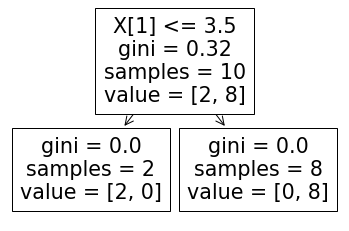

In [35]:
x1 = df2.iloc[:,:2].values
x2 = df2.iloc[:,-1].values
dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(x1,x2)
plot_tree(dt2)
plt.show()


<AxesSubplot:>

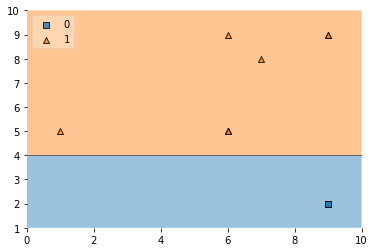

In [24]:
plot_decision_regions(x1,x2,dt2,legend=2)


In [25]:
df2['ypred'] =dt2.predict(x1)
df2


,X1,X2,label,ypred
6,6,5,0,1
9,9,2,0,0
6,6,5,0,1
9,9,2,0,0
8,9,9,0,1
0,1,5,1,1
6,6,5,0,1
8,9,9,0,1
7,7,8,1,1
5,6,9,1,1


# Applying Ada boost from SKlearn

In [34]:
error2 = alpha(0.5)
print(error2)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=500)
ada.fit(x1,x2)


0.0


AdaBoostClassifier(n_estimators=500)

In [27]:
ada.predict(x1)


array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
x2


array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)